# Cycle Data Evaluating a classification model

***Declaration ***: The  coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section. 

What are the **features**?
- trip_id: A unique number to identify each trip

- From station Number: From station number where the trip Start    
    
- Day: Day of the trip for example Monday, Tuesday etc.
    
- Month: Which month trip took place
    
- Duration: Total trip duration in minutes
    
- birthyear: Birth year of user
    
- Sex: Gender identification of user
    
- age: Current age of user

What is the **response**?
- Station Number: To Station Number where the trip ends

**Question:** Can we predict the End station of a bicycle trip by given trip dataset?

# Purpose of model evaluation

- Need a way to choose between models: different model types, tuning parameters, and features
- Use a **model evaluation procedure** to estimate how well a model will generalize to out-of-sample data
- Requires a **model evaluation metric** to quantify the model performance

### Model evaluation procedures

1. **Training and testing on the same data**
    - Rewards overly complex models that "overfit" the training data and won't necessarily generalize
2. **Train/test split**
    - Split the dataset into two pieces, so that the model can be trained and tested on different data
    - Better estimate of out-of-sample performance, but still a "high variance" estimate
    - Useful due to its speed, simplicity, and flexibility
3. **K-fold cross-validation**
    - Systematically create "K" train/test splits and average the results together
    - Even better estimate of out-of-sample performance
    - Runs "K" times slower than train/test split

### Model evaluation metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

## Classification accuracy

# Libraries used

In [2]:
import os,csv,io,mapsplotlib,time,folium,googlemaps,geopy,zipfile,requests,warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mysql.connector as sql
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
warnings.simplefilter('ignore')

C:\Users\mrferozi\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# display plots in the notebook
%matplotlib inline

In [4]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('select trip_id,floor(tripduration_minutes) Duration,from_station_id_num,to_station_id_num,to_station_id,Day_num Day,bmonth Month,year Year,age Age,Sex_num Gender,sthours Hours from trip_clean where to_station_id_num in(36,37);')
table_rows = db_cursor.fetchall()
data = pd.read_sql('select trip_id,floor(tripduration_minutes) Duration,from_station_id_num,to_station_id_num,to_station_id,Day_num Day,bmonth Month,year Year,age Age,Sex_num Gender,sthours Hours from trip_clean where to_station_id_num in(36,37);', con=db_connection)
df = pd.DataFrame(data)
df.tail()

,trip_id,Duration,from_station_id_num,to_station_id_num,to_station_id,Day,Month,Year,Age,Gender,Hours
10420,255018,8.0,17,37,SLU-07,6,8,2016,47,2,9
10421,255026,11.0,20,36,SLU-04,6,8,2016,26,1,9
10422,255030,5.0,19,37,SLU-07,6,8,2016,30,1,9
10423,255036,6.0,13,37,SLU-07,6,8,2016,40,1,10
10424,255085,11.0,7,37,SLU-07,6,8,2016,31,1,13


In [5]:
# create the 'label' dummy variable using the 'map' method
df['label'] = df.to_station_id.map({'SLU-07':1, 'SLU-04':0})

In [6]:
df.tail()

,trip_id,Duration,from_station_id_num,to_station_id_num,to_station_id,Day,Month,Year,Age,Gender,Hours,label
10420,255018,8.0,17,37,SLU-07,6,8,2016,47,2,9,1
10421,255026,11.0,20,36,SLU-04,6,8,2016,26,1,9,0
10422,255030,5.0,19,37,SLU-07,6,8,2016,30,1,9,1
10423,255036,6.0,13,37,SLU-07,6,8,2016,40,1,10,1
10424,255085,11.0,7,37,SLU-07,6,8,2016,31,1,13,1


What is the **response**?
- Station Number: To Station Number where the trip ends

**Question:** Can we predict the End station of a bicycle trip by given trip dataset?

In [7]:
# define X and y
feature_cols = ['trip_id','Duration','from_station_id_num','Day','Month','Age','Gender','Hours']
X = df[feature_cols]
y = df.label

In [8]:
# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
y_pred_class

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

**Classification accuracy:** percentage of correct predictions

In [11]:
# calculate accuracy
from sklearn import metrics
a =metrics.accuracy_score(y_test, y_pred_class)
print(metrics.accuracy_score(y_test, y_pred_class))

0.621787495205


**Null accuracy:** accuracy that could be achieved by always predicting the most frequent class

In [12]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

1    1343
0    1264
Name: label, dtype: int64

In [13]:
# calculate the percentage of ones
y_test.mean()

0.5151515151515151

In [14]:
# calculate the percentage of zeros
1 - y_test.mean()

0.48484848484848486

In [15]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)*100

1    51.515152
Name: label, dtype: float64

Comparing the **true** and **predicted** response values

In [16]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0]
Pred: [1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]


**Classification accuracy:** percentage of correct predictions

In [17]:
# calculate accuracy
from sklearn import metrics
a =metrics.accuracy_score(y_test, y_pred_class)
print((metrics.accuracy_score(y_test, y_pred_class))*100)

62.1787495205


Classification accuracy or percentage of correct predictions is ***62.17*** Percent is  bad. 

**Conclusion:**

- Classification accuracy is the **easiest classification metric to understand**
- But, it does not tell you the **underlying distribution** of response values
- And, it does not tell you what **"types" of errors** your classifier is making

## Confusion matrix

Table that describes the performance of a classification model

In [18]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[887 377]
 [609 734]]


The bottom right is called the true positive. It is indicate that 734 cases the classifier identified correctly predicted the to_station number (end station).Upper left is called true negative in 887 cases the classifier correctly predicted.The upper right is called false positive indicate the 377 cases the classifier incorrectly predicted when in-fact they do not.The bottom left is called the false negative which indicated from the 609 cases the classifier predicted incorrectly.

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* fall between End station (To_station)
- **True Negatives (TN):** we *correctly* predicted that they *don't* fall between End station (To_station)
- **False Positives (FP):** we *incorrectly* predicted that they *do* fall between End station (To_station) (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have fall between End station (To_station) (a "Type II error")

In [19]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0]
Pred: [1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [20]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)

In [21]:
confusion

array([[887, 377],
       [609, 734]])

Where 1 represent positive and 0 present negative.

In [22]:
#Where 1 represent positive and 0 present negative.
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [23]:
print (((TP + TN) / float(TP + TN + FP + FN))*100,' ','Percent')
print ((metrics.accuracy_score(y_test, y_pred_class))*100,' ','Percent')

62.1787495205   Percent
62.1787495205   Percent


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [24]:
print (((FP + FN) / float(TP + TN + FP + FN))*100,' ','Percent')
print ((1 - metrics.accuracy_score(y_test, y_pred_class))*100,' ','Percent')

37.8212504795   Percent
37.8212504795   Percent


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [25]:
Sensitivity =((TP / float(TP + FN))*100)
print ((TP / float(TP + FN))*100,' ','Percent')

54.6537602383   Percent


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [26]:
specificity=((TN / float(TN + FP))*100)
print((TN / float(TN + FP))*100,' ','Percent')

70.1740506329   Percent


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [27]:
print((TP / float(TP + FP))*100,' ','Percent')

66.0666066607   Percent


**Conclusion:**

- Confusion matrix gives us a **more complete picture** of how our classifier is performing
- Also allows us to compute various **classification metrics**, and these metrics can guide model model selection

## Adjusting the classification threshold

In [28]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [29]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.41726387,  0.58273613],
       [ 0.52979737,  0.47020263],
       [ 0.44199653,  0.55800347],
       [ 0.46377986,  0.53622014],
       [ 0.99563954,  0.00436046],
       [ 0.63714538,  0.36285462],
       [ 0.66322039,  0.33677961],
       [ 0.1904182 ,  0.8095818 ],
       [ 0.483926  ,  0.516074  ],
       [ 0.62262909,  0.37737091]])

In [30]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.58273613,  0.47020263,  0.55800347,  0.53622014,  0.00436046,
        0.36285462,  0.33677961,  0.8095818 ,  0.516074  ,  0.37737091])

In [31]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [32]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

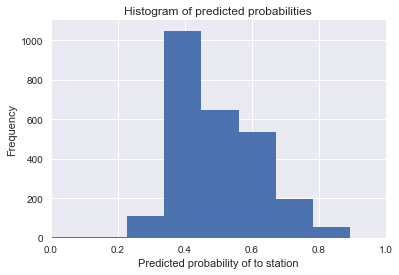

In [33]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of to station')
plt.ylabel('Frequency')

Histogram show us the distribution of numerical variable we can see the height of the third bar for example 1100 percent of the observations had values between 0.3 and 0.4 given the 0.5 classification threshold as above mention we can see from the histogram the end station 37 is rarely predicted. Since only the small minority of the testing set observation had a predicted probability above the threshold. For better specificity and sensitivity, we will adjust the threshold from 0.5 to 0.3.

**Decrease the threshold** for predicting to station in order to **increase the sensitivity** of the classifier

In [34]:
# predict to station if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.4)[0]

In [35]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([ 0.58273613,  0.47020263,  0.55800347,  0.53622014,  0.00436046,
        0.36285462,  0.33677961,  0.8095818 ,  0.516074  ,  0.37737091])

In [36]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.])

In [37]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[887 377]
 [609 734]]


In [38]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[ 446  818]
 [ 215 1128]]


The bottom right is called the true positive. It is indicating that 1128 cases the classifier identified correctly predicted and which is 53.67 percent increased. The Upper left is called true negative is now 446 cases the classifier correctly predicted, and which is decrease 49.71 percent. The upper right is called false positive indicate the 818 cases the classifier incorrectly predicted the journey which is 117 percent increased. The bottom left is called the false negative which indicated from the 215 cases which is decreased by 65 percent.

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* fall between End station (To_station)
- **True Negatives (TN):** we *correctly* predicted that they *don't* fall between End station (To_station)
- **False Positives (FP):** we *incorrectly* predicted that they *do* fall between End station (To_station) (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have fall between End station (To_station) (a "Type II error")

Our main purpose of the exercise to increase the True positive which is increased by 53.67 and decrease the true negative which is decrease 49.71 percent. It is not the great result but this study decides to use Linear support vector for further classification model evaluation to obtain a better result and to find better model.

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

In [39]:
print('Previouse Sensitivity',Sensitivity)

Previouse Sensitivity 54.6537602383


In [40]:
# sensitivity has increased (used to be 0.24)
Present_Sensitivity=((46 / float(46 + 16))*100)
print((46 / float(46 + 16))*100)

74.19354838709677


In [41]:
print ('sensitivity has increased:',Present_Sensitivity - Sensitivity,'Percent')

sensitivity has increased: 19.5397881488 Percent


**Specificity:** When the actual value is negative, how often is the prediction correct?

In [42]:
print('Previouse specificity','',specificity)

Previouse specificity  70.1740506329


In [43]:
# specificity has decreased (used to be 0.91)
Present_specificity=((80 / float(80 + 50))*100)
print((80 / float(80 + 50))*100)

61.53846153846154


In [44]:
print ('Specificity has decreased:',specificity - Present_specificity,'Percent')

Specificity has decreased: 8.63558909445 Percent


Since the observation move from left column to right column that guarantee that number of false positive will increase and true negative will decreased which decreases the specificity. 

**Conclusion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

## ROC Curves and Area Under the Curve (AUC)
By, using ROC Curves and Area Under the Curve (AUC).We could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold

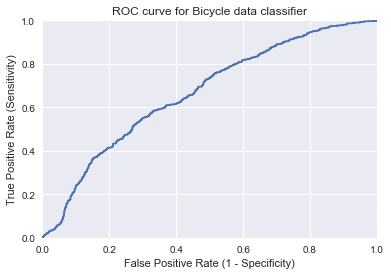

In [45]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Bicycle data classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

- ROC curve can help us to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- We can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [46]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [47]:
evaluate_threshold(0.5)

Sensitivity: 0.546537602383
Specificity: 0.701740506329


In [48]:
evaluate_threshold(0.3)

Sensitivity: 0.997021593448
Specificity: 0.0110759493671


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [49]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.665956035515


- AUC is useful as a **single number summary** of classifier performance.
- If we randomly chose one positive and one negative observation, AUC represents the likelihood that our classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

In [50]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.65329949441385016

**Confusion matrix advantages:**

- Allows us to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require us to **set a classification threshold**
- Still useful when there is **high class imbalance**

------------------------------------

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)

-------------------------